In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


# 1. LUD


### CUDA:
In order to let `make` work without error, change `-arch=sm_13` to `-arch=sm_75` in **`makefile`**.

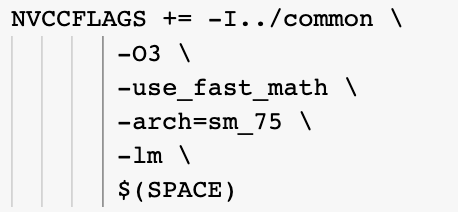

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/cuda/lud/'
!ls

/content/drive/MyDrive/rodinia_3.1/cuda/lud
base  common  cuda  Makefile  README  run  tools


In [ ]:
!make clean
!make

cd cuda; make clean
make[1]: Entering directory '/content/drive/MyDrive/rodinia_3.1/cuda/lud/cuda'
rm -f lud_cuda ../common/common.o lud.o lud_kernel.o *.linkinfo
make[1]: Leaving directory '/content/drive/MyDrive/rodinia_3.1/cuda/lud/cuda'
cd cuda; make
make[1]: Entering directory '/content/drive/MyDrive/rodinia_3.1/cuda/lud/cuda'
nvcc  -I../common -O3 -use_fast_math -arch=sm_75 -lm  -DGPU_TIMER  -o ../common/common.o -c ../common/common.c
../common/common.c: In function ‘create_matrix_from_file’:
../common/common.c:51:3: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
   fscanf(fp, "%d\n", &size);
   ^~~~~~~~~~~~~~~~~~~~~~~~~
../common/common.c:61:11: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
           fscanf(fp, "%f ", m+i*size+j);
           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nvcc  -I../common -O3 -use_fast_math -arch=sm_75 -lm  -DGPU_TIMER  -o lud.o -c lud.cu
nvcc  -

In [ ]:
!./cuda/lud_cuda -s 1024

WG size of kernel = 16 X 16
Generate input matrix internally, size =1024
Creating matrix internally size=1024
Time consumed(ms): 8.932000


### OpenMP:

Change `CC := icc` to `CC := gcc`; `CXX := icc` to `CXX := gcc` in **`makefile`**.

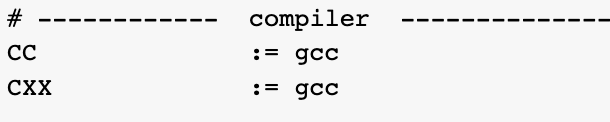

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/openmp/lud'
!ls

/content/drive/MyDrive/rodinia_3.1/openmp/lud
base  common  Makefile	omp  README  run  run_offload  tools


In [ ]:
!make clean
!make

cd omp; make clean ; make -f Makefile.offload clean
make[1]: Entering directory '/content/drive/MyDrive/rodinia_3.1/openmp/lud/omp'
rm --force lud_omp lud.o lud_omp.o ../common/common.o *~
make[1]: Leaving directory '/content/drive/MyDrive/rodinia_3.1/openmp/lud/omp'
make[1]: Entering directory '/content/drive/MyDrive/rodinia_3.1/openmp/lud/omp'
rm --force lud_omp_offload lud.o lud_omp.o ../common/common.o *~
make[1]: Leaving directory '/content/drive/MyDrive/rodinia_3.1/openmp/lud/omp'
cd omp; make
make[1]: Entering directory '/content/drive/MyDrive/rodinia_3.1/openmp/lud/omp'
gcc  -c -Wall -O3   -fopenmp -I../common lud.c -o lud.o
gcc  -c -Wall -O3   -fopenmp -I../common lud_omp.c -o lud_omp.o
gcc  -c -Wall -O3   -fopenmp -I../common ../common/common.c -o ../common/common.o
../common/common.c: In function ‘create_matrix_from_file’:
../common/common.c:51:3: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
   fscanf(fp, "%d\n", &s

In [ ]:
!./omp/lud_omp -s 1024

Generate input matrix internally, size =1024
Creating matrix internally size=1024
running OMP on host
Time consumed(ms): 127.454000


# 2. NW

No modification is needed to let it work.

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/cuda/nw/'
!ls

/content/drive/MyDrive/rodinia_3.1/cuda/nw
Makefile	 needle     needle.h	      README
Makefile_nvidia  needle.cu  needle_kernel.cu  run


In [ ]:
!make clean
!make

rm -f needle needle.linkinfo result.txt
/usr/local/cuda/bin/nvcc  needle.cu -o needle -I/usr/local/cuda/include -L/usr/local/cuda/lib64 


In [ ]:
!nvprof ./needle 16000,16000 3

WG size of kernel = 16 
Start Needleman-Wunsch
==1551== NVPROF is profiling process 1551, command: ./needle 16000,16000 3
Processing top-left matrix
Processing bottom-right matrix
==1551== Profiling application: ./needle 16000,16000 3
==1551== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   55.37%  653.87ms         1  653.87ms  653.87ms  653.87ms  [CUDA memcpy DtoH]
                   36.78%  434.32ms         2  217.16ms  214.16ms  220.15ms  [CUDA memcpy HtoD]
                    3.93%  46.371ms      1000  46.371us  12.704us  95.199us  needle_cuda_shared_1(int*, int*, int, int, int, int)
                    3.92%  46.337ms       999  46.383us  12.512us  94.079us  needle_cuda_shared_2(int*, int*, int, int, int, int)
      API calls:   75.93%  1.13928s         3  379.76ms  214.36ms  704.53ms  cudaMemcpy
                   20.78%  311.81ms         2  155.91ms  1.1265ms  310.69ms  cudaMalloc
                    2.99%  4

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/openmp/gaussian/'
!ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/rodinia_3.1/openmp/gaussian/'
/content/drive/MyDrive/rodinia_3.1/cuda/nw
Makefile	 needle     needle.h	      README
Makefile_nvidia  needle.cu  needle_kernel.cu  run


In [ ]:
!make clean
!make

rm -f needle needle.linkinfo result.txt
/usr/local/cuda/bin/nvcc  needle.cu -o needle -I/usr/local/cuda/include -L/usr/local/cuda/lib64 


In [ ]:
!nvprof ./needle 16000,16000 10

WG size of kernel = 16 
Start Needleman-Wunsch
==1613== NVPROF is profiling process 1613, command: ./needle 16000,16000 10
Processing top-left matrix
Processing bottom-right matrix
==1613== Profiling application: ./needle 16000,16000 10
==1613== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   54.90%  643.96ms         1  643.96ms  643.96ms  643.96ms  [CUDA memcpy DtoH]
                   37.76%  442.90ms         2  221.45ms  220.66ms  222.24ms  [CUDA memcpy HtoD]
                    3.95%  46.379ms      1000  46.378us  12.704us  94.207us  needle_cuda_shared_1(int*, int*, int, int, int, int)
                    3.38%  39.683ms       999  39.723us  9.4390us  95.327us  needle_cuda_shared_2(int*, int*, int, int, int, int)
      API calls:   76.56%  1.13128s         3  377.09ms  220.89ms  687.89ms  cudaMemcpy
                   20.10%  296.96ms         2  148.48ms  983.21us  295.98ms  cudaMalloc
                    3.04% 

# 3. lavaMD

### CUDA

Change `CUDA_FLAG = -arch sm_13` to `CUDA_FLAG = -arch sm_75` in **`makefile`**

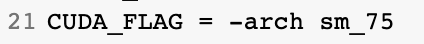

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/cuda/lavaMD/'
!ls

/content/drive/MyDrive/rodinia_3.1/cuda/lavaMD
kernel	lavaMD	main.c	main.h	main.o	makefile  README  result.txt  run  util


In [ ]:
!make clean
!make

rm	*.o \
	./kernel/*.o \
	./util/num/*.o \
	./util/timer/*.o \
	./util/device/*.o \
	lavaMD
gcc	  main.c \
		-c \
		-o main.o \
		-O3
main.c: In function ‘main’:
main.c:95:6: warning: implicit declaration of function ‘strcmp’ [-Wimplicit-function-declaration]
   if(strcmp(argv[dim_cpu.cur_arg], "-boxes1d")==0){
      ^~~~~~
main.c:228:8: warning: implicit declaration of function ‘time’; did you mean ‘true’? [-Wimplicit-function-declaration]
  srand(time(NULL));
        ^~~~
        true
/usr/local/cuda/bin/nvcc 						./kernel/kernel_gpu_cuda_wrapper.cu \
								-c \
								-o ./kernel/kernel_gpu_cuda_wrapper.o \
								-O3 \
								-arch sm_75
./kernel/kernel_gpu_cuda_wrapper.cu: In function ‘void kernel_gpu_cuda_wrapper(par_str, dim_str, box_str*, FOUR_VECTOR*, double*, FOUR_VECTOR*)’:
./kernel/kernel_gpu_cuda_wrapper.cu:66:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
  cudaThreadSynchronize();
                       ^
/usr/local/cud

In [ ]:
!./lavaMD -boxes1d 16

thread block size of kernel = 128 
Configuration used: boxes1d = 16
Time spent in different stages of GPU_CUDA KERNEL:
 0.210116997361 s, 27.657052993774 % : GPU: SET DEVICE / DRIVER INIT
 0.000487000012 s,  0.064102306962 % : GPU MEM: ALO
 0.006982999854 s,  0.919150829315 % : GPU MEM: COPY IN
 0.538170993328 s, 70.837791442871 % : GPU: KERNEL
 0.002882000059 s,  0.379348784685 % : GPU MEM: COPY OUT
 0.001082999981 s,  0.142551958561 % : GPU MEM: FRE
Total time:
0.759723007679 s


### OpenMP

No midification needed.

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/openmp/lavaMD/'
!ls

/content/drive/MyDrive/rodinia_3.1/openmp/lavaMD
kernel	lavaMD	main.c	main.h	main.o	makefile  README  run  util


In [ ]:
!make clean
!make

rm	*.o \
	./kernel/*.o \
	./util/num/*.o \
	./util/timer/*.o \
                ./util/device/*.o \
	lavaMD
rm: cannot remove './util/device/*.o': No such file or directory
makefile:67: recipe for target 'clean' failed
make: *** [clean] Error 1
gcc	 main.c \
		-c \
		-o main.o \
		-O3
main.c: In function ‘main’:
main.c:95:6: warning: implicit declaration of function ‘strcmp’ [-Wimplicit-function-declaration]
   if(strcmp(argv[dim_cpu.cur_arg], "-cores")==0){
      ^~~~~~
main.c:253:8: warning: implicit declaration of function ‘time’; did you mean ‘true’? [-Wimplicit-function-declaration]
  srand(time(NULL));
        ^~~~
        true
gcc				./kernel/kernel_cpu.c \
					-c \
					-o ./kernel/kernel_cpu.o \
					-O3 \
					-fopenmp
./kernel/kernel_cpu.c: In function ‘kernel_cpu’:
./kernel/kernel_cpu.c:206:31: warning: unknown conversion type character ‘:’ in format [-Wformat=]
  printf("%15.12f s, %15.12f % : CPU/MCPU: VARIABLES\n",    (float) (time1-time0) / 1000000, (float) (time1-time0

In [ ]:
!./lavaMD -boxes1d 16

Configuration used: cores = 1, boxes1d = 16
Time spent in different stages of CPU/MCPU KERNEL:
 0.000000000000 s,  0.000000000000 % : CPU/MCPU: VARIABLES
 0.000013000000 s,  0.000039381739 % : MCPU: SET DEVICE
 0.000000000000 s,  0.000000000000 % : CPU/MCPU: INPUTS
33.010208129883 s, 99.999961853027 % : CPU/MCPU: KERNEL
Total time:
33.010223388672 s
